# Assignment 2

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Friday, August 24, 2018**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]

<Figure size 1117.75x1000 with 20 Axes>

> **Ex. 11.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an `int` which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus exercise (for 11.1.4), calculate the accuracy on training data using the updated weights as input in the predict function. Any progress yet?

You can use the following functions:

```python
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])
    
    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)
```

>
> Make sure your function takes the arguments `X, y, W, eta` and take the name  `perceptronEpoch`

In [2]:
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])

    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)

In [3]:
# [Answer to Ex. 11.1.5]

def perceptronEpoch(X, y, W, eta = 0.1):
    errors=0
    for xi,yi in zip(X,y):
        update=eta*(yi-predict(xi,W))
        W[1:]=W[1:]+update*xi
        W[0]=W[0]+update
        errors=errors+int(update!=0)
    return W,errors

In [4]:
w, e = perceptronEpoch(Xtrain, ytrain, random_weights(), 0.1)
assert len(w) == 5
assert isinstance(e, int)

> **Ex. 11.1.6:** Write a function which repeat the updating procedure (calls the function) you constructed in 11.1.5 for `n_iter` times by packing the whole thing in a loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```

Please make sure that your function is named `Perceptron` and takes the arguments `X, y, n_iter, eta`


In [5]:
# [Answer to Ex. 11.1.6]

def Perceptron(X, y, n_iter = 50, eta = 0.1):
    weights=random_weights()
    errorseq=list()
    
    for i in range(n_iter):
        weights,e = perceptronEpoch(X,y,weights,eta)
        errorseq.append(e)
        
    return weights, errorseq

In [6]:
trained_w, errorseq = Perceptron(Xtrain, ytrain, 50, 0.1)
assert len(trained_w) == 5
assert len(errorseq) == 50
assert all(isinstance(i, int) for i in errorseq)

## Problems from exercise set 12
>Get the required data by running the cell below

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

> **Ex.12.2.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? 
>
> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  
>
>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`
>
>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

Name you transformed training data set `X_train2` and your test data set `X_test2`

In [8]:
# [Answer to Ex. 12.2.1]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
poly=PolynomialFeatures(degree=3,include_bias=False,interaction_only=True)
scaler=StandardScaler()

x_train_data=poly.fit_transform(X_train)
X_train2= scaler.fit_transform(x_train_data)

x_test_data=poly.transform(X_test)
X_test2 =scaler.transform(x_test_data)

In [9]:
assert 'PolynomialFeatures' in dir()
assert np.allclose(X_train2.mean(axis=0), 0)
assert np.allclose(X_train2.std(axis=0), 1)

> **Ex.12.2.2**: Estimate the Lasso model on the train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the test and train data. 
>
>> *Hint*: use `logspace` in numpy to create the range.

Please name your root mean square function `rmse` which takes the arguments `y_pred, y_true`.
Please store you results in a list named `output` which is a list of lists. `output` should take the following form `[[<lambda parameter>, <root mean squared error for training data>, <root mean squared error for test data>]]`


In [72]:
# [Answer to Ex. 12.2.2] 



'''IKKE FÆRDIG'''




from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

def rmse(y_pred, y_true):
    return sqrt(mse(y_pred, y_true))

lambdas=np.logspace(-4,4,20)
train=[]
pred=[]

for lambda_ in lambdas:
    lasso_m = Lasso(alpha=lambda_,random_state=1001)
    lasso_m.fit(X_train2,y_train)
    y_pred=lasso_m.predict(X_test2)
    train.append(rmse(y_train, y_test))
    pred.append(rmse(y_pred,y_test))
    
output=

3

In [73]:
assert len(output) == 20
assert all(len(i) == 3 for i in output)
assert np.allclose([i[0] for i in output], np.logspace(-4, 4, 20))

AssertionError: 

> **Ex.12.2.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

Please store your DataFrame in a variable named `MSE_df`

C:\Users\Mikkel\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


NotImplementedError: 

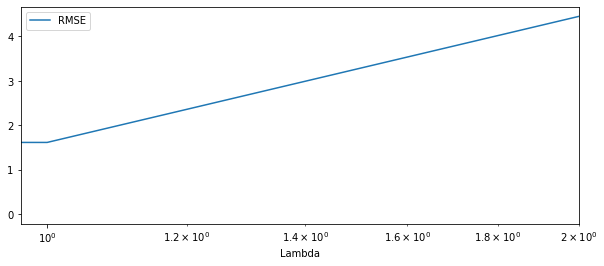

In [82]:
# [Answer to Ex. 12.2.3]
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

MSE_df=pd.DataFrame(output)

fig,ax=plt.subplots(figsize=(10,4))
MSE_df[1].plot(logx=True,label="RMSE")
ax.set_xlabel("Lambda")
ax.legend()

# YOUR CODE HERE
raise NotImplementedError()

In [83]:
assert MSE_df.shape[0] == 20

AssertionError: 

## Problems from exercise set 13

> **Ex. 13.1.3:**
Run a Lasso regression using the Pipeline from `Ex 13.1.2`. In the outer loop searching through the lambdas specified below. 
In the inner loop make 5 fold cross validation on the selected model and store the average MSE for each fold. Which lambda gives the lowest test MSE?
>
You are supposed to append list elements to the list `mses` where the elements are `[the average of the mean squared errors of the kfolded TRAINING data with the specific lambda, the average of the mean squared errors of the kfolded TEST data with the specific lambda, the SPECIFIC LAMBDA]`. The length of the list should be 12 because you've got 12 different lambda parameters.

>
>> *Hint:* `KFold` in `sklearn.model_selection` may be useful.
>
> This code will give you the required data: 

In [10]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

In [35]:
# [Answer to Ex. 13.1.3]
from sklearn.model_selection import KFold

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=2)    
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=2)

lambdas =  np.logspace(-4, 4, 12) # define lambda - devide into 12 lambdas between 10**-4 and 10**4
kfolds = KFold(n_splits=5) # define nr. of folds

mse_val = []
mse_test = []
mse_val_avr = []
mse_test_avr = []
lambda_list = []

#Outer-loop (Lambdas)
for lambda_ in lambdas:
#Inner-loop (Folds)
    mse_val_ = []
    mse_test_ = []
    
    # Split the dataset into 5 folds, and loop through each fold. 
    # In the iteration, the fold in question acts as the training-set. 
    for train_idx,val_idx in kfolds.split(X_dev, y_dev):
    # train model and compute MSE on test fold
        pipe_Lasso_CV = make_pipeline(PolynomialFeatures(include_bias=False, degree = 3), 
                        StandardScaler(with_mean = 0, with_std = True ),
                        Lasso(alpha = lambda_, random_state=1))
        # Assign X_train & y_train by extracting elements if the folds from X_dev and y_dev
        X_train, y_train = X_dev.iloc[train_idx], y_dev[train_idx]
        # Assign X_val & y_val by extracting elements of the folds from X_dev and y_dev
        X_val, y_val = X_dev.iloc[val_idx], y_dev[val_idx] 
        # Fit Lasso-model to training data
        pipe_Lasso_CV.fit(X_train, y_train)   
        #Calculate and append the mse into mse_val list:
        mse_val_.append(mse(pipe_Lasso_CV.predict(X_val), y_val))
        ##Calculate and append the mse into mse_test list:
        mse_test_.append(mse(pipe_Lasso_CV.predict(X_test), y_test))
        
    mse_val_avr.append(sum(mse_val_)/len(mse_val_))
    mse_test_avr.append(sum(mse_val_)/len(mse_val_))
    mse_val.append(mse_val_)
    mse_test.append(mse_test_)



df_val = pd.DataFrame(mse_val_avr, index = lambdas)
df_test = pd.DataFrame(mse_test_avr, index = lambdas)
df_join = pd.concat([df_test, df_val], axis=1)

df_with_index = df_join.reset_index()
mses = df_with_index.values.tolist()
mses

    

[[0.0001, 41.13380096553595, 41.13380096553595],
 [0.0005336699231206312, 32.37421594835057, 32.37421594835057],
 [0.002848035868435802, 7.162217102695318, 7.162217102695318],
 [0.01519911082952933, 0.5929383951494878, 0.5929383951494878],
 [0.08111308307896872, 0.6533091823155663, 0.6533091823155663],
 [0.43287612810830617, 0.8719801031205575, 0.8719801031205575],
 [2.310129700083158, 1.3170635781546818, 1.3170635781546818],
 [12.32846739442066, 1.3170635781546818, 1.3170635781546818],
 [65.79332246575683, 1.3170635781546818, 1.3170635781546818],
 [351.11917342151344, 1.3170635781546818, 1.3170635781546818],
 [1873.8174228603868, 1.3170635781546818, 1.3170635781546818],
 [10000.0, 1.3170635781546818, 1.3170635781546818]]

In [36]:
assert len(mses) == 12
assert all(len(i) == 3 for i in mses)
assert all(isinstance(i[0], float) for i in mses)
assert all(isinstance(i[1], float) for i in mses)
assert all(isinstance(i[2], float) for i in mses)

# Exercise Set 15: Text Classification and Sentiment Analysis

*Morning, August 21, 2019*

In this Exercise Set you will practice using two basic text classification methods: rule- and machine learning-based. The exercise has XX parts:

1. Implement a lexical look-up method.
2. Apply pre-packaged rulebased dictionaries.
3. Train a simple baseline machine learning classifier.

In the end, you will then compare the results of these approaches.

First, load our standard stuff and import the following modules:

In [1]:
## Standard stuff:
import numpy as np, seaborn as sns, pandas as pd
## For text classification:
import nltk, nltk.sentiment, sklearn
%matplotlib inline

## Exercise 15 Part 1: Implementing your own Lexical Lookup method
There are many curated dictionaries and lexicons online for all sorts of topics (see for instance this project: https://hedonometer.org/index.html where the lexicons behind it can be downloaded here: https://github.com/andyreagan/hedonometer/blob/master/hedonometer/static/hedonometer/labMT1.txt). For this exercise we will use the following list of positive and negative words (positive:http://ptrckprry.com/course/ssd/data/negative-words.txt ; negative: http://ptrckprry.com/course/ssd/data/positive-words.txt) compilled by Hu and Liu. 

We will use the following dataset (a random sample of the trustpilot review data we collected in exercise 8) to practice on.

> **Ex. 15.1.1:**  Load it like this (remember to import the `request` package): 

```python 
# download data
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)```

The important columns are ***reviewBody*** containing the text, and the ***reviewRating_ratingValue*** containing the rating / stars.

In [2]:
# [Answer to Ex. 15.1.1]
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)

In [3]:
assert isinstance(df, pd.DataFrame)
assert df.shape == (10000, 21)

> **Ex. 15.1.2:** Next, we should download and prepare the dictionaries.
1. Download the lists using python's `requests.get()`. The lists are documents of words separated by new line (which is the '\n' character). 
2. Make sure to remove the comment section in the top by splitting at the right place. 
3. `.split()` these documents into words.
4. Convert them into sets (using the `set()`-command) and assign these to two variables (e.g. ***positive*** and ***negative***). 

*Hint*: You can do all of the above in one line of code per list.

Please make sure your positive set is named `positive` and your negative set `negative`

In [4]:
# [Answer to Ex. 15.1.2]
import requests
url_pos='http://ptrckprry.com/course/ssd/data/positive-words.txt'
url_neg='http://ptrckprry.com/course/ssd/data/negative-words.txt'
pos= requests.get(url_pos).text.split("\n")[35:]
neg= requests.get(url_neg).text.split("\n")[35:]
positive=set(pos)
negative=set(neg)

In [5]:
assert isinstance(positive, set)
assert isinstance(negative, set)
assert len(positive) == 2007
assert len(negative) == 4784

Now we need to prepare the trustpilot reviews, our documents to be analyzed. This means lowercasing and tokenizing them to match the format that our dictionary comes in.

> **Ex. 15.1.3:** Define a function `preprocessing(string)`, that takes in a string and returns a list of words. The function should do the following: 
1. lowercases the string using the `.lower()` command.
2. tokenize the words using the `nltk.tokenize.TweetTokenizer()` which is good for social media type user content (i.e. emojiies and more free use of punctuation and commas. 
3. return tokenized documents.

*Hint*: You can first initialize the tokenizer (outside the preprocessing function), and then you use the `.tokenize()` method.

Please make sure your tweettokenizer instance is store in a variable named `tokenizer` and your preprocessing function should take the name `preprocessing` that takes the argument `string`

In [6]:
# [Answer to Ex 15.1.3]
import nltk, nltk.sentiment
tokenizer=nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    w=tokenizer.tokenize(string)
    words=[word.lower() for word in w]
    return words

In [7]:
tweet = "Denmark is a very special country with incredible people, but based on Prime Minister Mette Frederiksen’s comments, that she would have no interest in discussing the purchase of Greenland, I will be postponing our meeting scheduled in two weeks for another time...."
assert isinstance(tokenizer, nltk.tokenize.TweetTokenizer)
assert preprocessing(tweet)[:3] == ['denmark', 'is', 'a']

>**Ex 15.1.4:** Apply the preprocessing function to all the documents (i.e. our review texts in the column ***reviewBody***).

*Hint:* Use the `.apply()` method.

Please store your processed pandas series in a variable named `documents`

In [8]:
# [Answer to Ex 15.1.4]
documents=df["reviewBody"].apply(preprocessing)

In [9]:
assert isinstance(documents, pd.Series)
assert documents.shape == (10000,)
assert documents.apply(lambda x: isinstance(x, list)).all()
assert documents.apply(lambda x: all(isinstance(i, str) for i in x)).all()

Now, we need to match the words in our dictionaries to the tokenized documents.
>**Ex 15.1.5:** Define a function `count_dictionary(document,dictionary)` that takes a tokenized document and a set of words (i.e. the dictionaries we loaded in Ex 15.1.2) and counts the number of matches. The function should do the following:
1. Filter the words not in the dictionary. 
*Hint*: you can use a list comprehension or for loop and `if word in` condition. 
2. Return the length of the filtered document.		

Please make sure your function is named `count_dictionary` and takes the arguments `tokenized_doc, dictionary`

In [10]:
# [Answer Ex 15.1.5]
#def count_dictionary(tokenized_doc,dictionary):
def count_dictionary(tokenized_doc,dictionary):
    hits=[word for word in tokenized_doc if word in dictionary]
    return len(hits)

In [11]:
in_positive = ['precisely',
 'futurestic',
 'indebted',
 'vouchsafe',
 'freedoms',
 'grandeur',]

not_in_positive = [
    "wascs",
    "cpajos"
]

l = in_positive + not_in_positive
assert count_dictionary(l, positive) == len(in_positive)

>**Ex 15.1.6:** Define two new columns (***positive_liu***, ***negative_liu***) in the dataframe applying the count_dictionary function to all tokenized documents with the positive and negative set as input. 

*Hint:* the `.apply()` method allows you to input named arguments matching your `count_dictionary()` function to input the sentiment dictionary. 

Please make sure that you have stored the number of words in the dataframed named `df` in the columns `positive_liu` and `negative_liu` 

In [46]:
# [Answer Ex 15.1.6]
df["positive_liu"]=[count_dictionary(i, positive) for i in documents]

df["negative_liu"]=[count_dictionary(i, negative) for i in documents]

In [47]:
assert df['positive_liu'].apply(lambda x: isinstance(x, (int, float))).all()
assert df['negative_liu'].apply(lambda x: isinstance(x, (int, float))).all()